In [1]:
import os, sys

path_name = os.path.dirname(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(path_name)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from Engine.Data.IO import IO
from Engine.Pipeline.pipeline import NextoptBasePipeline,NextoptWeekdayDMPipeline,NextoptWeekdayDMProphetPipeline
from Engine.Data.IO import IO
from Engine.Data.transformer import Transformer
from Engine.Data.explorer import Explorer

# 1. Input
path_name = os.path.dirname(os.path.abspath(os.path.dirname(os.getcwd())))
sys.path.append(path_name)
print(path_name)

data_dir = path_name + '/Data/DB'

df_pallets = IO.read_pickle(data_dir + '/KPP일별_발주_유형별전처리.pkl') 
# 2. Transformer
df_pallets.head()
df_pallets.transformer.dt_format = '%Y%m%d' 

df_N11 = df_pallets.transformer.get(code=['N11'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31').fillna(0.0)
df_L14 = df_pallets.transformer.get(code=['L14'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31').fillna(0.0)
df_P11 = df_pallets.transformer.get(code=['P11'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31').fillna(0.0)
df_P13= df_pallets.transformer.get(code=['P13'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31').fillna(0.0)
df_P14= df_pallets.transformer.get(code=['P14'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31').fillna(0.0)
df_set=[df_N11,df_L14,df_P11,df_P13,df_P14]

import sklearn
from sklearn.cluster import KMeans
import numpy as np
def prepare_clustering(df_mean):
    a=[]
    for i in df_mean:
        i=[i]
        a.append(i)
    return a
def clustering(a):
    for i in range(1,8):
        kmeans=KMeans(n_clusters=i, random_state=1).fit(a)
        print(kmeans.labels_)
        
for df in df_set:
    df.explorer.plot_by_weekday()
    df_mean = df.explorer.stats_by_weekday()['mean']
    a=prepare_clustering(df_mean)
    clustering(a)
    print("===========")


/Users/moonygo/Documents/NextoptEngine_light
[0 0 0 0 0 0 0]
[1 1 1 1 1 0 0]
[1 1 1 1 1 0 2]
[3 1 1 1 1 0 2]
[3 1 1 4 1 0 2]
[3 1 5 4 5 0 2]
[3 1 5 4 6 0 2]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 1]
[2 2 2 2 2 0 1]
[2 2 2 2 3 0 1]
[4 2 4 2 3 0 1]
[4 2 4 5 3 0 1]
[6 2 4 5 3 0 1]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 1]
[0 0 0 0 2 0 1]
[0 0 3 3 2 0 1]
[4 0 3 3 2 0 1]
[4 5 3 3 2 0 1]
[4 5 3 6 2 0 1]
[0 0 0 0 0 0 0]
[0 0 0 0 0 1 1]
[1 1 1 1 1 0 2]
[3 1 1 1 1 0 2]
[3 1 4 1 1 0 2]
[3 1 4 5 5 0 2]
[3 1 4 6 5 0 2]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 1]
[2 0 2 0 0 2 1]
[0 2 3 2 2 0 1]
[4 2 3 2 2 0 1]
[4 2 3 5 2 0 1]
[4 6 3 5 2 0 1]


In [3]:
clustering_result=['01234', '56']

SET INDEX AS DS(DateTimeIndex)
CROSS VALIDATION SPLIT IS DONE.
DIVIDE TRAIN BY WEEKDAY
DIVIDE EACH FOLD BY WEEKDAY
FOLD  1  DIVISION  1  RESET TRAIN, TEST INDEX FOR PROPHET MODEL


/anaconda3/envs/nextopt/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


FOLD  1  DIVISION  2  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  2  DIVISION  1  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  2  DIVISION  2  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  3  DIVISION  1  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  3  DIVISION  2  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  4  DIVISION  1  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  4  DIVISION  2  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  5  DIVISION  1  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  5  DIVISION  2  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  6  DIVISION  1  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  6  DIVISION  2  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  7  DIVISION  1  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  7  DIVISION  2  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  8  DIVISION  1  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  8  DIVISION  2  RESET TRAIN, TEST INDEX FOR PROPHET MODEL
FOLD  9  DIVISION  1  RESET TRAIN, TEST 

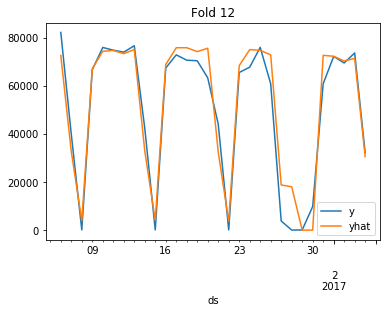

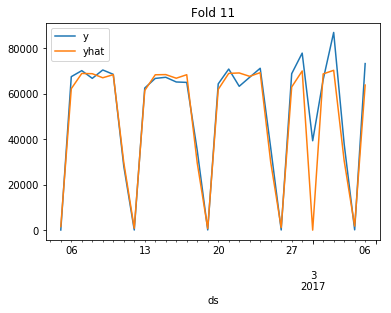

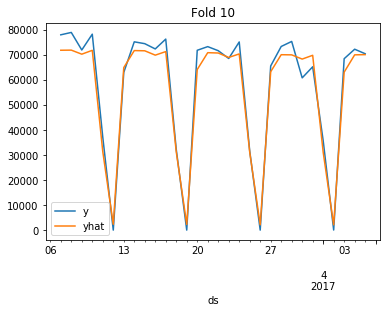

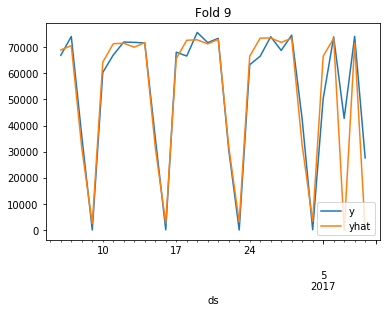

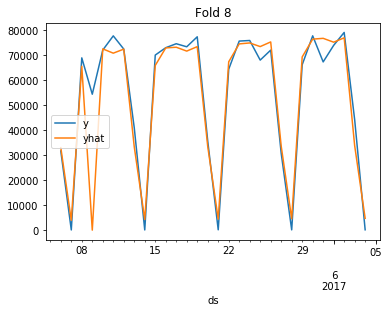

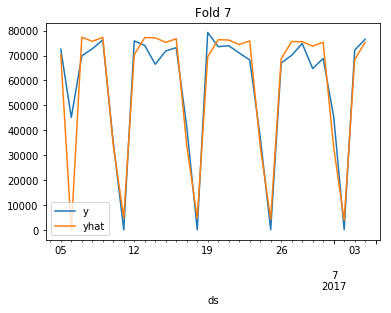

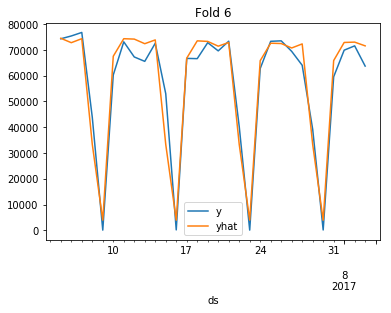

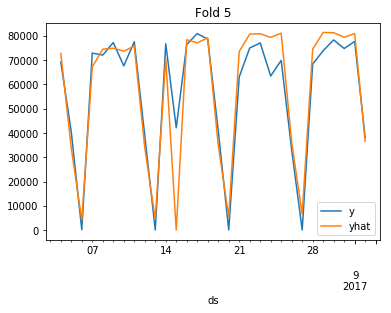

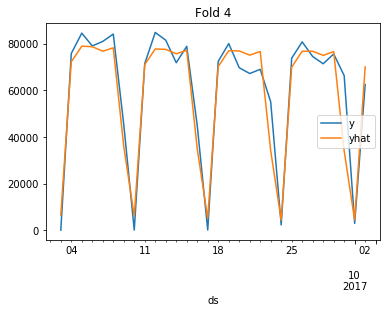

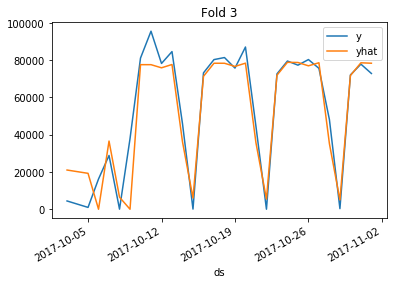

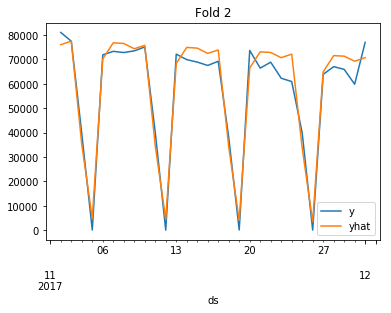

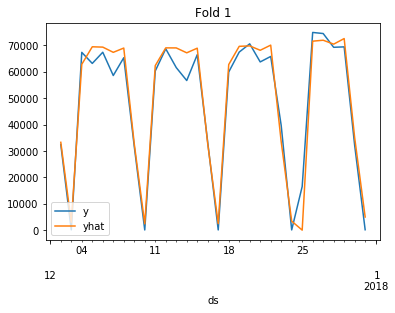

In [4]:
df = df_pallets.transformer.get(code=['N11'], weekday=[0,1,2,3,4,5,6],start='2012-01-01', end='2017-12-31')
df = df.fillna(0)
df = df.reset_index()
df.columns = ['ds','y']

pipeline = NextoptWeekdayDMProphetPipeline()
pipeline.raw_data = df
pipeline.horizon = 30 # 예측할 기간(defualt: 30)
pipeline.unit = 'd'

df_holiday_main = IO.read_pickle('../../Data/기타/holiday/1. 설날과추석.pkl')
df_holiday_sub = IO.read_pickle('../../Data/기타/holiday/2. 일반공휴일.pkl')
df_holiday_main['lower_window'] = 0
df_holiday_main['upper_window'] = 0
df_holiday_main['holiday'] = '중요휴일'

df_holiday_sub['lower_window'] = 0
df_holiday_sub['upper_window'] = 0
df_holiday_sub['holiday'] = '보통휴일'

df_holidays = pd.concat([df_holiday_main, df_holiday_sub])

pipeline.cross_validation_split(fold = 12)

#pipeline.division_condition = ['0','1','2','3','4','5','6'] # mon - thur, sat, sun
#pipeline.division_condition=['01234','5','6']
#pipeline.division_condition=['012345','6']
pipeline.division_condition = clustering_result
pipeline.division_condition

pipeline.model = Prophet(
        daily_seasonality= False,
        weekly_seasonality= True,
        yearly_seasonality= True,
        holidays = df_holidays
)
pipeline.fit_and_predict()
pipeline.merge_forecast()

pipeline.postprocess(holiday_correction_dict={0: df_holiday_main,
                                          0: df_holiday_sub
                                         })
pipeline.evaluate()
pipeline.print_summary()
pipeline.plot_forecast()

In [5]:
pipeline.print_summary()

    Fold       From         To     Real     Predict     Error  Error(%)  \
12    12 2017-01-06 2017-02-04  1512068  1560825.10 -48757.10     -3.22   
11    11 2017-02-05 2017-03-06  1557184  1467275.05  89908.95      5.77   
10    10 2017-03-07 2017-04-05  1715286  1656875.99  58410.01      3.41   
9      9 2017-04-06 2017-05-05  1599588  1552693.75  46894.25      2.93   
8      8 2017-05-06 2017-06-04  1618014  1567698.94  50315.06      3.11   
7      7 2017-06-05 2017-07-04  1718152  1714950.40   3201.60      0.19   
6      6 2017-07-05 2017-08-03  1699665  1728982.72 -29317.72     -1.72   
5      5 2017-08-04 2017-09-02  1703679  1732042.11 -28363.11     -1.66   
4      4 2017-09-03 2017-10-02  1808586  1752079.77  56506.23      3.12   
3      3 2017-10-03 2017-11-01  1570505  1510293.87  60211.13      3.83   
2      2 2017-11-02 2017-12-01  1697172  1749817.91 -52645.91     -3.10   
1      1 2017-12-02 2017-12-31  1438054  1485599.73 -47545.73     -3.31   

    Total Error  Total E

In [6]:
161605.76+141628.76+104727.97+164065.76+153216.51+181391.58+129844.62+190385.58+180646.80+213333.55+139885.40+116387.47

1877119.76

In [8]:
1877119.76/360

5214.221555555556